# OpenAI Embeddings

- Author: [ro__o_jun](https://github.com/ro-jun)
- Design: []()
- Peer Review : [byoon](https://github.com/acho98), [liniar](https://github.com/namyoungkim)
- This is a part of [LangChain Open Tutorial](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/08-Embeeding/01-OpenAIEmbeddings.ipynb) [![Open in GitHub](https://img.shields.io/badge/Open%20in%20GitHub-181717?style=flat-square&logo=github&logoColor=white)](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/08-Embeeding/01-OpenAIEmbeddings.ipynb)

## Overview

This tutorial explores the use of `OpenAI Text embedding` models within the `LangChain` framework.  

It showcases how to generate embeddings for text queries and documents, reduce their dimensionality using **PCA** , and visualize them in 2D for better interpretability.  

By analyzing relationships between the query and documents through `cosine similarity`, it provides insights into how embeddings can enhance workflows, including **text analysis** and **data visualization**.  

### Table of Contents


- [Overview](#Overview)
- [Environment Setup](#environment-setup)
- [Load model and set dimension](#Load-model-and-set-dimension)
- [Similarity Calculation (Cosine Similarity)](#similarity-calculation-cosine-similarity)
- [Embeddings Visualization(PCA)](#Embeddings-Visualization\(PCA\))

### References

- [OpenAI](https://openai.com/index/new-embedding-models-and-api-updates/)
- [LangChain OpenAI Embeddings](https://python.langchain.com/api_reference/openai/embeddings/langchain_openai.embeddings.base.OpenAIEmbeddings.html)
- [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity)
- [Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)
----

## Environment Setup

Set up the environment. You may refer to [Environment Setup](https://wikidocs.net/257836) for more details.

**[Note]**
- `langchain-opentutorial` is a package that provides a set of easy-to-use environment setup, useful functions and utilities for tutorials. 
- You can checkout the [`langchain-opentutorial`](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) for more details.

In [1]:
%%capture --no-stderr
%pip install langchain-opentutorial

In [2]:
# Install required packages
from langchain_opentutorial import package

package.install(
    [
        "langchain_openai",
        "scikit-learn",
        "matplotlib",
    ],
    verbose=False,
    upgrade=False,
)

In [3]:
# Set environment variables
from langchain_opentutorial import set_env

set_env(
    {
        "OPENAI_API_KEY": "",
        "LANGCHAIN_API_KEY": "",
        "LANGCHAIN_TRACING_V2": "true",
        "LANGCHAIN_ENDPOINT": "https://api.smith.langchain.com",
        "LANGCHAIN_PROJECT": "OpenAI-Embeddings",
    },
)

Environment variables have been set successfully.


[Note] If you are using a `.env` file, proceed as follows.

In [4]:
from dotenv import load_dotenv

load_dotenv(override=True)

True

## Load model and set dimension

Describes the `Embedding` model and dimension settings supported by OpenAI.

### Why Adjust Embedding Dimensions?
- **Optimize Resources** : Shortened embeddings use less memory and compute.
- **Flexible Usage** : Models like text-embedding-3-large allow size reduction with the dimensions API.
- **Key Insight** : Even at 256 dimensions, performance can surpass larger models like text-embedding-ada-002.

This is a **description of the models** supported by OpenAI

<table>
  <thead>
    <tr>
      <th style="text-align: center;">Model</th>
      <th style="text-align: center;">~ Pages per Dollar</th>
      <th style="text-align: center;">Performance on MTEB Eval</th>
      <th style="text-align: center;">Max Input</th>
      <th style="text-align: center;">Available dimension</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center;">text-embedding-3-small</td>
      <td style="text-align: center;">62,500</td>
      <td style="text-align: center;">62.3%</td>
      <td style="text-align: center;">8191</td>
      <td style="text-align: center;">512, 1536</td>
    </tr>
    <tr>
      <td style="text-align: center;">text-embedding-3-large</td>
      <td style="text-align: center;">9,615</td>
      <td style="text-align: center;">64.6%</td>
      <td style="text-align: center;">8191</td>
      <td style="text-align: center;">256, 1024, 3072</td>
    </tr>
    <tr>
      <td style="text-align: center;">text-embedding-ada-002</td>
      <td style="text-align: center;">12,500</td>
      <td style="text-align: center;">61.0%</td>
      <td style="text-align: center;">8191</td>
      <td style="text-align: center;">1536</td>
    </tr>
  </tbody>
</table>

"Initialize and utilize OpenAI embedding models using `langchain_openai` package."

In [7]:
from langchain_openai import OpenAIEmbeddings

# Set desired model
openai_embedding = OpenAIEmbeddings(model="text-embedding-3-large")

**[note]** If dimension reduction is necessary, please set as below.

In [6]:
from langchain_openai import OpenAIEmbeddings

# Set desired model and dimension
openai_embedding = OpenAIEmbeddings(model="text-embedding-3-large", dimensions=1024)

Define `query` and `documents`

In [8]:
query = "What is the Open AI's gpt embedding model?"

# Various embedding models
documents = [
    "all-mpnet-base-v2",
    "bert-base-nli-mean-tokens",
    "bert-large-nli-mean-tokens",
    "distilbert-base-nli-mean-tokens",
    "roberta-base-nli-stsb-mean-tokens",
    "roberta-large-nli-stsb-mean-tokens",
    "sentence-transformers/all-MiniLM-L12-v2",
    "sentence-transformers/all-distilroberta-v1",
    "sentence-transformers/paraphrase-MiniLM-L3-v2",
    "sentence-transformers/paraphrase-mpnet-base-v2",
    "sentence-transformers/msmarco-distilbert-base-v3",
    "sentence-transformers/msmarco-MiniLM-L6-cos-v5",
    "sentence-transformers/msmarco-roberta-base-v2",
    "xlnet-base-cased",
    "facebook/bart-large",
    "facebook/dpr-question_encoder-single-nq-base",
    "google/electra-small-discriminator",
    "google/electra-base-discriminator",
    "google/electra-large-discriminator",
    "deepset/sentence_bert",
    "deepset/roberta-base-squad2",
    "gpt-neo-125M",
    "gpt-neo-1.3B",
    "gpt-neo-2.7B",
    "gpt-j-6B",
    "text-embedding-ada-002",
    "text-embedding-3-small",
    "text-embedding-3-large",
    "all-MiniLM-L6-v2",
    "multilingual-e5-base",
]

Now we embed the query and document using the set embedding model.

In [9]:
query_vector = openai_embedding.embed_query(query)
docs_vector = openai_embedding.embed_documents(documents)

print("number of documents: " + str(len(docs_vector)))
print("dimension: " + str(len(docs_vector[0])))

# Part of the sliced ​​vector
print("query: " + str(query_vector[:5]))
print("documents[0]: " + str(docs_vector[0][:5]))
print("documents[1]: " + str(docs_vector[1][:5]))

number of documents: 30
dimension: 3072
query: [-0.00288043892942369, 0.020187586545944214, -0.011613684706389904, -0.02147459052503109, 0.02403634414076805]
documents[0]: [-0.03383158519864082, 0.004126258660107851, -0.025896472856402397, -0.013592381030321121, -0.0021926583722233772]
documents[1]: [0.0051429239101707935, -0.015500376932322979, -0.019089050590991974, -0.027715347707271576, -0.00695410929620266]


## Similarity Calculation (Cosine Similarity)

This code calculates the similarity between the query and the document through `Cosine Similarity` .  
Find the documents **similar (top 3) and (bottom 3)** .

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
similarity = cosine_similarity([query_vector], docs_vector)

# Sorting by in descending order
sorted_idx = similarity.argsort()[0][::-1]

# Display top 3 and bottom 3 documents based on similarity
print("Top 3 most similar document:")
for i in range(0, 3):
    print(
        f"[{i+1}] similarity: {similarity[0][sorted_idx[i]]:.3f} | {documents[sorted_idx[i]]}"
    )

print("\nBottom 3 least similar documents:")
for i in range(1, 4):
    print(
        f"[{i}] similarity: {similarity[0][sorted_idx[-i]]:.3f} | {documents[sorted_idx[-i]]}"
    )

Top 3 most similar document:
[1] similarity: 0.514 | text-embedding-3-large
[2] similarity: 0.467 | text-embedding-ada-002
[3] similarity: 0.457 | text-embedding-3-small

Bottom 3 least similar documents:
[1] similarity: 0.050 | facebook/bart-large
[2] similarity: 0.143 | multilingual-e5-base
[3] similarity: 0.171 | all-mpnet-base-v2


## Embeddings visualization(PCA)

Reduce the dimensionality of the embeddings for visualization purposes.  
This code uses **principal component analysis (PCA)** to reduce high-dimensional embedding vectors to **two dimensions**.  
The resulting **2D points** are displayed in a scatterplot, with each point labeled for its corresponding document.

### Why Dimension Reduction?
High-dimensional embedding vectors are challenging to interpret and analyze directly.
By reducing them to 2D, we can:

- **Visually explore relationships** between embeddings (e.g., clustering, grouping).
- **Identify patterns or anomalies** in the data that may not be obvious in high dimensions.
- **Improve interpretability** , making the data more accessible for human analysis and decision-making.


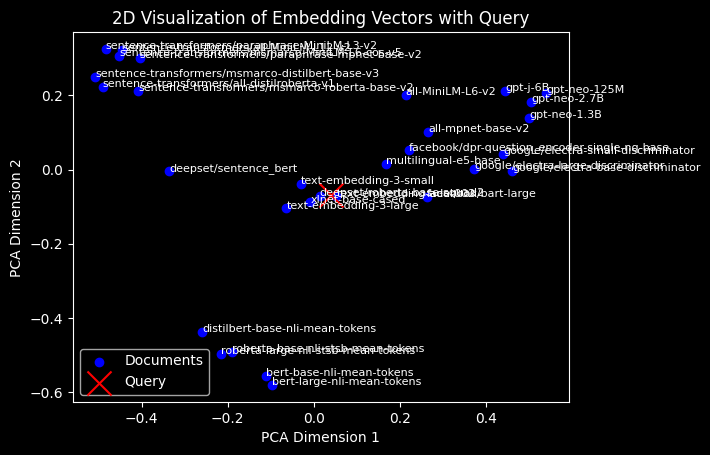

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Combine documents and query for PCA
all_vectors = np.vstack([docs_vector, query_vector])  # Stack query vector with docs
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(all_vectors)

# Separate reduced vectors for documents and query
doc_vectors_2d = reduced_vectors[:-1]  # All but the last point (documents)
query_vector_2d = reduced_vectors[-1]  # Last point (query)

# Plot the reduced vectors
plt.scatter(doc_vectors_2d[:, 0], doc_vectors_2d[:, 1], color="blue", label="Documents")
plt.scatter(
    query_vector_2d[0],
    query_vector_2d[1],
    color="red",
    label="Query",
    marker="x",
    s=300,
)

# Annotate document points
for i, doc in enumerate(documents):
    plt.text(doc_vectors_2d[i, 0], doc_vectors_2d[i, 1], doc, fontsize=8)

# Add plot details
plt.title("2D Visualization of Embedding Vectors with Query")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()